In [ ]:
#@title
# Import libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')
download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/chap01.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
from ModSimPy_Functions.chap01 import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/modsim.py
Downloaded ModSimPy_Functions/chap01.py


In [ ]:
def run_simulation(p1,p2,iAug, iMol, num_steps):
    # Create Series to store state variables
    state = pd.Series(dict(augie=iAug, moline=iMol,augie_empty=0,moline_empty=0,
                           clock=0),name="Number of Bikes")
    # Create Series to store results
    results = pd.Series([],dtype=object)
    results[0] = state.augie

    # Run through time steps and return the state Series
    for i in range(num_steps):
        change_func(state,p1,p2)
        results[i+1] = state.augie
    return state


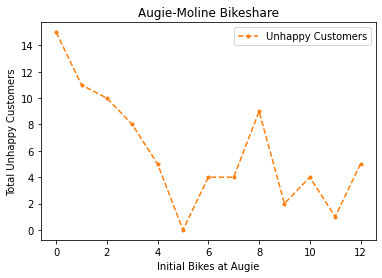

In [ ]:
# Sweep through possible values of iAug and iMol
p1 = 0.5;  p2 = 0.4;  num_steps = 60;  num_params  = 13

# Create Series to hold sweep results
sweep = pd.Series([],name = "Unhappy Customers", dtype=object)
sweep.index.name = "Initial Bikes at Augie"

for i in range(num_params):
    final_state = run_simulation(p1, p2, i, 12-i, num_steps)
    sweep[i] = final_state.augie_empty + final_state.moline_empty

sweep.plot(xlabel=sweep.index.name, ylabel="Total Unhappy Customers",
            title='Augie-Moline Bikeshare', color='C1',legend=True,
            linestyle='--',marker='.');

## Exercise 1 (Create run_multiple_sims)

In [ ]:
## Define run_multiple_sims in this cell.
## It should:
##      * Create an empty Series called 'unhappy' to store results
##      * Run run_simulation num_runs times
##            * For each run, store the number of unhappy customers in 'unhappy'
##      * Return 'unhappy'
##
## Your function will be structured in a similar way to the run_simulation from
## Notebook 1.2.3 (but will have significant differences)

def run_multiple_sims(p1,p2,iAug,iMol,num_steps,num_sims):




In [ ]:
## Call run_multiple_simulations using the parameters listed above
## Return the function to a variable called 'unhappy_results'
## Display 'unhappy_results' in a DataFrame table
unhappy_results = run_multiple_sims(0.5,0.4,10,2,60,20)



In [ ]:
## Print your mean value of 'unhappy_results' using the function .mean()


### Exercise 2

✅ ✅ So now we have a function that can run the same simulation multiple times.  The next incremental step is do this multiple times, using different initial states, and compare the metrics.  

* Use `iAug` values that range from 0 to 12.

* Store the results in yet another `Series`, with an index column of "Number of bikes initially at Augie" and a values column of "Average number of unhappy customers."

* Plot the average number of unhappy customers as a function of `iAug`.  Label the axes.

Our goal is to find the value of `p1` that minimizes the average number of unhappy customers.

In [ ]:
## Define your parameters
p1 = 0.5
p2 = 0.4
num_steps = 60
## Let's increase num_runs, since the computational time is short
num_runs = 100

## Create an empty series called 'unhappy_ave' to store results


In [ ]:
## Write a loop that that includes run_multiple_simulations
## in order to populate 'unhappy_ave'
## The code in this notebook should help you do this (look in the
## 'Sweeping Parameters' section of the notebook)


In [ ]:
# Plot 'unhappy_ave' with axis labels


### Exercise 3

✅ ✅ Take a moment and look at the results from exercise 2.  What is the ideal number of bikes to put at Augie in the morning? Look at the parameters, and explain in a couple sentences why that makes sense.

✅ ✅ Put answer here.

### Exercise 4

✅ ✅  Let's play!

<br>

Now go back and change some of the parameters (`num_steps`, `p2`, total number of bikes).  Predict the results in your head, then run the simulation:

* What happens if `p1`=`p2`?  Or if `p1` is significantly different than `p2`?
* What happens if the `p1` and `p2` both get higher? Lower?
* What happens if there are more total bikes?  
* What happens if you run more steps (`num_steps`)?
* What happens if you increase `num_runs` to 500 (the computation will take a bit longer, but not more than a minute or two)?  

✅ ✅ Put answer here.